## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [20]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [21]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [22]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [23]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [24]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [25]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [26]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [27]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [28]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

model = Model(inputs=resnet.input, outputs=prediction)

In [29]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [30]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12264\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
2/2 [==============================] - 12s 7s/step - loss: 8.3953 - accuracy: 0.2344 - val_loss: 7.8024 - val_accuracy: 0.3276
Epoch 2/20
2/2 [==============================] - 8s 6s/step - loss: 5.2331 - accuracy: 0.3594 - val_loss: 5.7638 - val_accuracy: 0.1552
Epoch 3/20
2/2 [==============================] - 9s 7s/step - loss: 5.1056 - accuracy: 0.3125 - val_loss: 3.2938 - val_accuracy: 0.5172
Epoch 4/20
2/2 [==============================] - 9s 6s/step - loss: 3.1069 - accuracy: 0.3750 - val_loss: 1.6024 - val_accuracy: 0.3276
Epoch 5/20
2/2 [==============================] - 9s 7s/step - loss: 1.9688 - accuracy: 0.3906 - val_loss: 3.0452 - val_accuracy: 0.3621
Epoch 6/20
2/2 [==============================] - 9s 7s/step - loss: 2.1714 - accuracy: 0.4531 - val_loss: 1.9919 - val_accuracy: 0.1552
Epoch 7/20
2/2 [==============================] - 9s 6s/step - loss: 1.3227 - accuracy: 0.4531 - val_loss: 1.7040 - val_accuracy: 0.5690
Epoch 8/20
2/2 [========================

In [52]:
print(r)

In [51]:
r.history

{'loss': [8.395341873168945,
  5.233083248138428,
  5.1055755615234375,
  3.1069493293762207,
  1.9687573909759521,
  2.1713967323303223,
  1.3227322101593018,
  1.7391763925552368,
  0.916365921497345,
  1.0881835222244263,
  0.9335482120513916,
  1.057440996170044,
  0.568664014339447,
  0.8440409898757935,
  0.6670766472816467,
  0.691547155380249,
  0.4991675317287445,
  0.5366495847702026,
  0.5026861429214478,
  0.4349895417690277],
 'accuracy': [0.234375,
  0.359375,
  0.3125,
  0.375,
  0.390625,
  0.453125,
  0.453125,
  0.515625,
  0.5625,
  0.515625,
  0.578125,
  0.5,
  0.75,
  0.640625,
  0.671875,
  0.671875,
  0.78125,
  0.71875,
  0.8125,
  0.828125],
 'val_loss': [7.802367687225342,
  5.763833045959473,
  3.2938268184661865,
  1.602446436882019,
  3.0452253818511963,
  1.9918755292892456,
  1.7039684057235718,
  1.4750988483428955,
  1.3927180767059326,
  1.1622505187988281,
  1.154567837715149,
  1.2982890605926514,
  1.0756250619888306,
  0.9622491002082825,
  1.2931

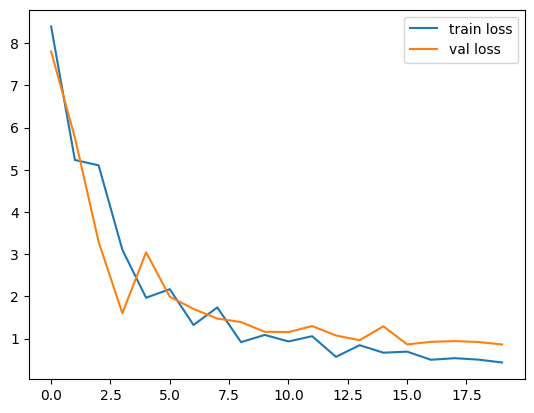

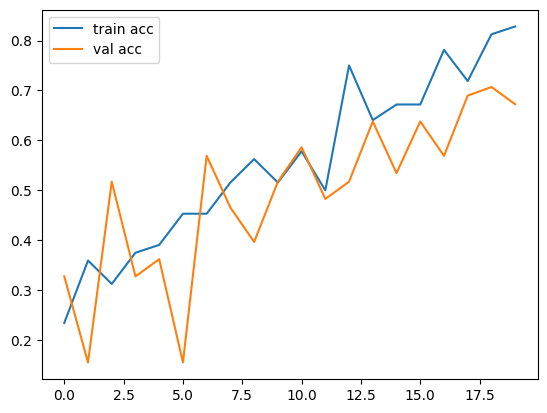

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [34]:

y_pred = model.predict(test_set)


2/2 [==============================] - 5s 2s/step


In [35]:
y_pred

array([[5.10229319e-02, 8.70199203e-01, 7.87778795e-02],
       [1.89737708e-04, 7.93751329e-03, 9.91872728e-01],
       [6.72982037e-02, 9.14729297e-01, 1.79725531e-02],
       [2.89909379e-03, 9.49966848e-01, 4.71340567e-02],
       [7.74877295e-02, 5.85721910e-01, 3.36790323e-01],
       [4.58599813e-02, 7.78375804e-01, 1.75764263e-01],
       [1.05068311e-01, 8.58397603e-01, 3.65340784e-02],
       [1.64453208e-01, 5.37305892e-01, 2.98240840e-01],
       [5.75939976e-02, 8.67441177e-01, 7.49648213e-02],
       [1.72053739e-01, 7.32057452e-01, 9.58888680e-02],
       [3.80605131e-01, 3.18023413e-01, 3.01371425e-01],
       [9.88126397e-02, 8.14346075e-01, 8.68413970e-02],
       [3.28967750e-01, 1.01906806e-01, 5.69125414e-01],
       [5.37218809e-01, 4.22409415e-01, 4.03717682e-02],
       [8.24656337e-02, 7.64482796e-01, 1.53051525e-01],
       [9.59880799e-02, 5.94588509e-03, 8.98066103e-01],
       [9.29414202e-03, 9.87943470e-01, 2.76248017e-03],
       [3.59030371e-03, 9.82361

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2], dtype=int64)

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_resnet50.h5')

In [41]:
model

In [42]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [43]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [44]:
x.shape

(224, 224, 3)

In [45]:
x=x/255

In [46]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

1/1 [==============================] - 1s 789ms/step


array([[0.00111957, 0.00190509, 0.9969753 ]], dtype=float32)

In [48]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 91ms/step


In [49]:
a==1

array([False])